## Removing outliers from data using percentile and zScore

In [ ]:
# Reference: codebasics on YouTube
# https://github.com/codebasics/math-for-machine-learning/tree/main/3_normal_distribution/Exercise

In [3]:
import pandas as pd
import seaborn as sn

In [4]:
df = pd.read_csv('bhp.csv')
df.head() 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [6]:
# We want to use only the "price_per_sqft", so we take only that column as a new set.

data = df[['price_per_sqft']]
data.head()

,price_per_sqft
0,3699
1,4615
2,4305
3,6245
4,4250


In [10]:
data.rename(columns = {'price_per_sqft': 'price'}, inplace = True)
data.head()

/var/folders/7k/h5zryrn94hb0s3snn_dzk38r0000gn/T/ipykernel_15497/4009721554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns = {'price_per_sqft': 'price'}, inplace = True)


,price
0,3699
1,4615
2,4305
3,6245
4,4250


In [11]:
# There are 13,200 data samples.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   13200 non-null  int64
dtypes: int64(1)
memory usage: 103.2 KB


In [14]:
# Notice minimum value is 267 and maximum value is 12000000, where the mean is 7920.337. 
# Clearly the maximun value is an outlier.

data.describe()

,price
count,1.320000e+04
mean,7.920337e+03
std,1.067272e+05
min,2.670000e+02
25%,4.267000e+03
50%,5.438000e+03
75%,7.317000e+03
max,1.200000e+07


<AxesSubplot:ylabel='Count'>

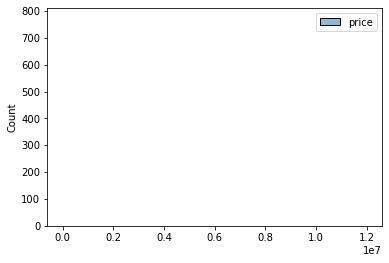

In [16]:
# The histogram is skewed because of the outlier with the max value 12000000.

sn.histplot(data)

## Percentile

In [20]:
# We want to remove the outliers from both ends: percentile rates of 0.001 and 0.999.
# 0.1% of data falls below minThreshold and 99.9% of data falls below maxThreshold

maxThreshold = data['price'].quantile(0.999)
print(maxThreshold)

minThreshold = data['price'].quantile(0.001)
print(minThreshold)

50959.36200000098
1366.184


In [23]:
# Examples of samples exceeding the max threshold = 50,959.36.

data[data['price'] > maxThreshold]


,price
345,672727
1005,200000
1106,625000
4044,12000000
4924,2300000
5911,51111
6356,76530
7012,76923
7575,176470
7799,53150


In [26]:
# Examples of samples below the min threshold = 1,366.18.

data[data['price'] < minThreshold]


,price
665,371
798,729
1867,267
2392,1250
3934,1300
5343,416
5417,1250
5597,1363
7166,573
7862,875


In [29]:
# Now the new dataframe contains 13172 samples. 28 outliers were removed.

df = data[(data['price'] < maxThreshold) & (data['price'] > minThreshold)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13172 entries, 0 to 13199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   13172 non-null  int64
dtypes: int64(1)
memory usage: 205.8 KB


<AxesSubplot:ylabel='Count'>

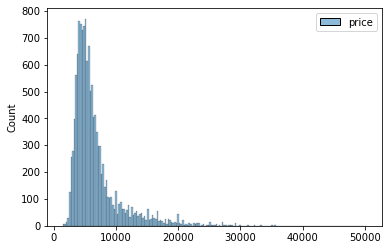

In [30]:
# Now we can see the histogram better. However, the outliers with high values are still skewing the view.

sn.histplot(df)

## Z Score

In [34]:
# Z score is a measure of how many standard deviations away the sample is from the mean. 
# We want to use zScore to remove the outliers.
# z = (sample - mean)/standard deviation.
# Standard deviation is calculated by Pandas.

# We add another column with z score values.
df['zScore'] = (df['price']- df.price.mean())/df.price.std()




/var/folders/7k/h5zryrn94hb0s3snn_dzk38r0000gn/T/ipykernel_15497/1273916435.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zScore'] = (df['price']- df.price.mean())/df.price.std()


In [35]:
df.describe()

,price,zScore
count,13172.000000,1.317200e+04
mean,6663.653735,-9.952561e-17
std,4141.020700,1.000000e+00
min,1379.000000,-1.276172e+00
25%,4271.000000,-5.777932e-01
50%,5438.000000,-2.959787e-01
75%,7311.000000,1.563253e-01
max,50349.000000,1.054942e+01


In [37]:
# There are 125 samples with z score higher than 4.

df[df['zScore'] > 4]

,price,zScore
9,36274,7.150495
45,33333,6.440283
190,27083,4.930994
733,23719,4.118633
760,31666,6.037725
...,...,...
13081,35000,6.842841
13094,27083,4.930994
13127,27083,4.930994
13185,44000,9.016218


In [39]:
# We drop the ones with z score greater than 4.
# Altogher, 153 outliers are removed.

data = df[df['zScore'] < 4]
data.describe()

,price,zScore
count,13047.000000,13047.000000
mean,6449.328045,-0.051757
std,3487.670005,0.842225
min,1379.000000,-1.276172
25%,4259.000000,-0.580691
50%,5415.000000,-0.301533
75%,7222.000000,0.134833
max,23214.000000,3.996683


<AxesSubplot:xlabel='price', ylabel='Count'>

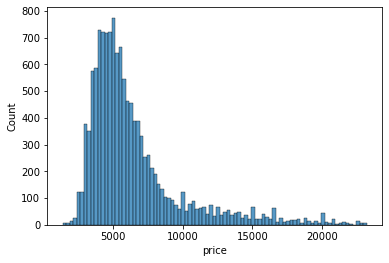

In [41]:
sn.histplot(data['price'])

In [44]:
# What if we drop the ones with z score higher than 3?
# Additionally close to 200 samples are removed.

df = data[data['zScore'] < 3]
df.describe()

,price,zScore
count,12874.000000,12874.000000
mean,6257.158614,-0.098163
std,3086.136007,0.745260
min,1379.000000,-1.276172
25%,4250.000000,-0.582864
50%,5368.500000,-0.312762
75%,7096.000000,0.104406
max,19061.000000,2.993790


<AxesSubplot:xlabel='price', ylabel='Count'>

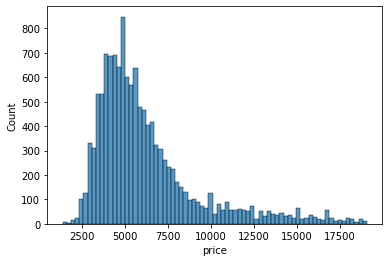

In [46]:
sn.histplot(df['price'])